In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('tips.csv', names=[i for i in range(1,9)])

In [4]:
df.shape

(245, 8)

In [5]:
df1 = pd.read_csv('tips.csv')

In [6]:
cols = df1.columns[1:]

In [7]:
cols

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [8]:
df.columns = ['number','total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

In [9]:
df.drop(['number'],axis=1, inplace=True)

In [10]:
df.drop(0, axis=0, inplace=True)

In [11]:
df = pd.concat([df, pd.get_dummies(df['sex'], drop_first=True)], axis=1)

In [12]:
df.drop('sex', inplace=True, axis=1)

In [13]:
df = pd.concat([df, pd.get_dummies(df['smoker'], drop_first=True)], axis=1)

In [14]:
df.drop('smoker', inplace=True, axis=1)

In [15]:
df.columns = ['total_bill','tip','day','time','size','Male','Smoker']

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   total_bill  244 non-null    object
 1   tip         244 non-null    object
 2   day         244 non-null    object
 3   time        244 non-null    object
 4   size        244 non-null    object
 5   Male        244 non-null    uint8 
 6   Smoker      244 non-null    uint8 
dtypes: object(5), uint8(2)
memory usage: 11.9+ KB


In [17]:
df['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [18]:
df = pd.concat([df, pd.get_dummies(df['time'], drop_first=True)], axis=1)
df.drop('time', inplace=True, axis=1)

In [19]:
#making total_bill and tip as float

In [20]:
df['tips'] = df['tip'].apply(lambda x:float(x))

In [21]:
df['Total_Bill'] = df['total_bill'].apply(lambda x:float(x))

In [22]:
df.drop(['total_bill','tip'], axis=1, inplace=True)

In [23]:
df['size'] = df['size'].apply(lambda x:int(x))

In [24]:
df = pd.concat([df,pd.get_dummies(df['day'])], axis=1)

In [25]:
df.drop('day', axis=1, inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   size        244 non-null    int64  
 1   Male        244 non-null    uint8  
 2   Smoker      244 non-null    uint8  
 3   Lunch       244 non-null    uint8  
 4   tips        244 non-null    float64
 5   Total_Bill  244 non-null    float64
 6   Fri         244 non-null    uint8  
 7   Sat         244 non-null    uint8  
 8   Sun         244 non-null    uint8  
 9   Thur        244 non-null    uint8  
dtypes: float64(2), int64(1), uint8(7)
memory usage: 9.3 KB


In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(df['tips'],df['size'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


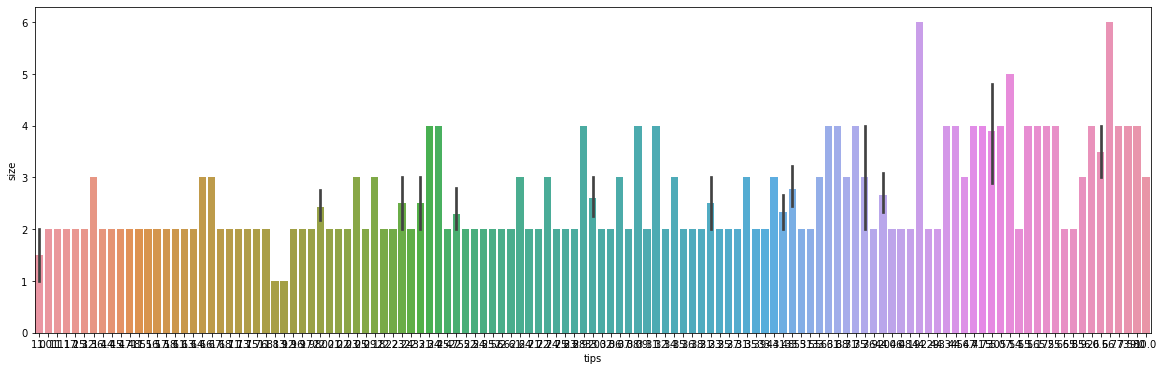

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


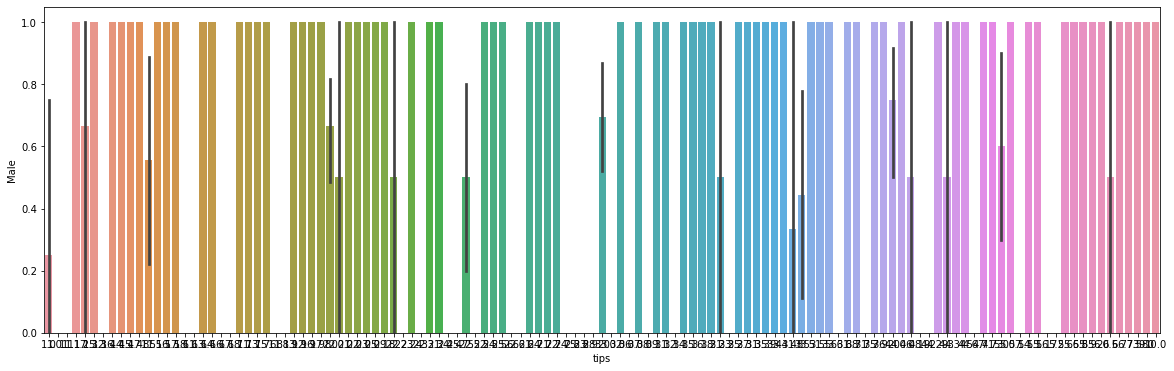

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


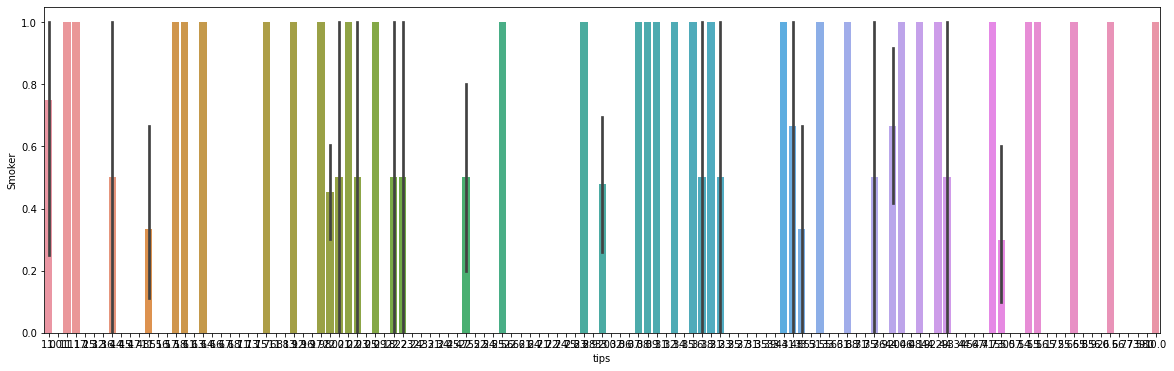

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


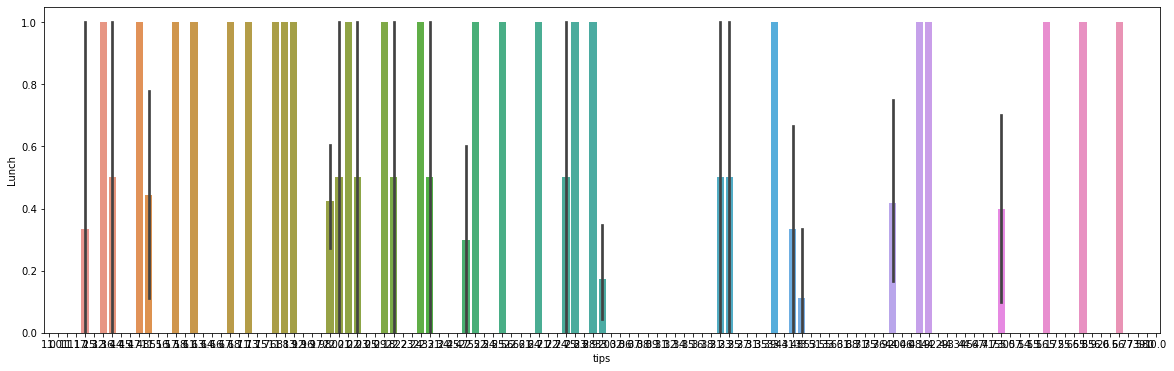

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


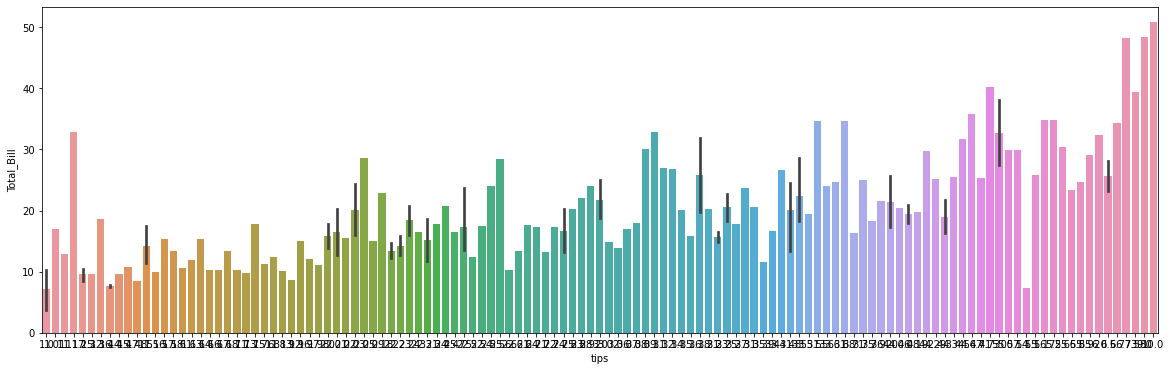

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


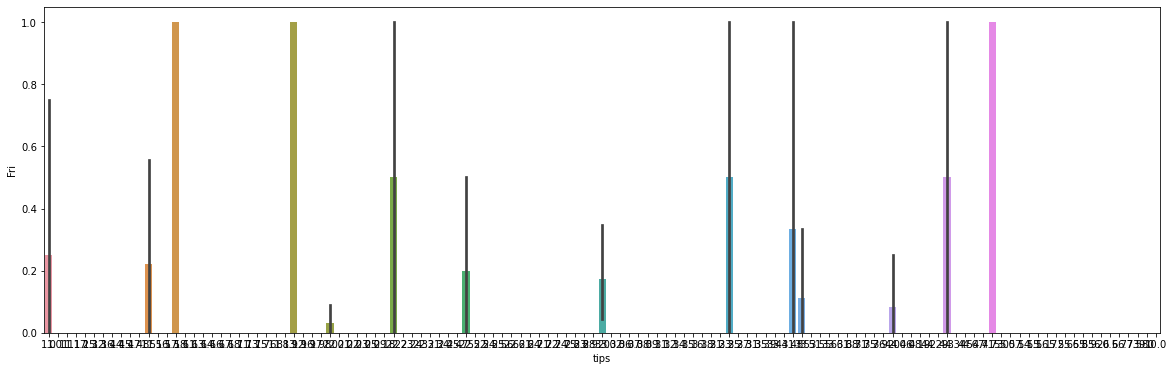

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


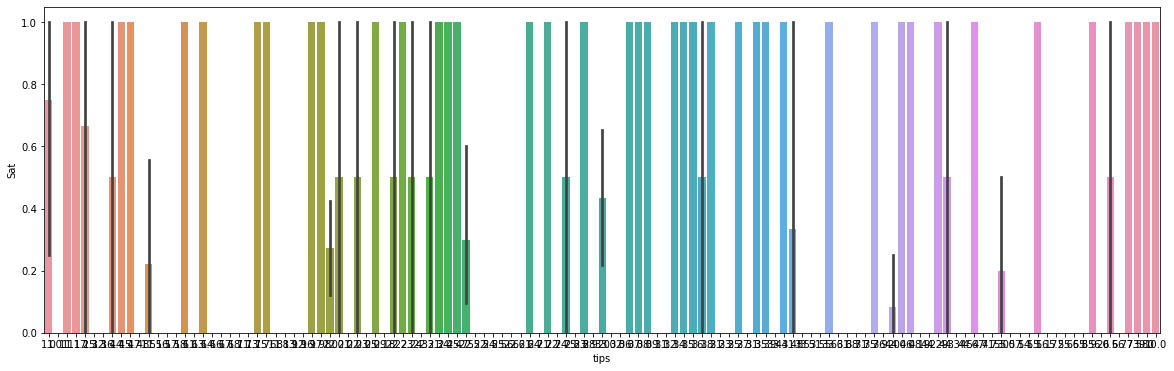

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


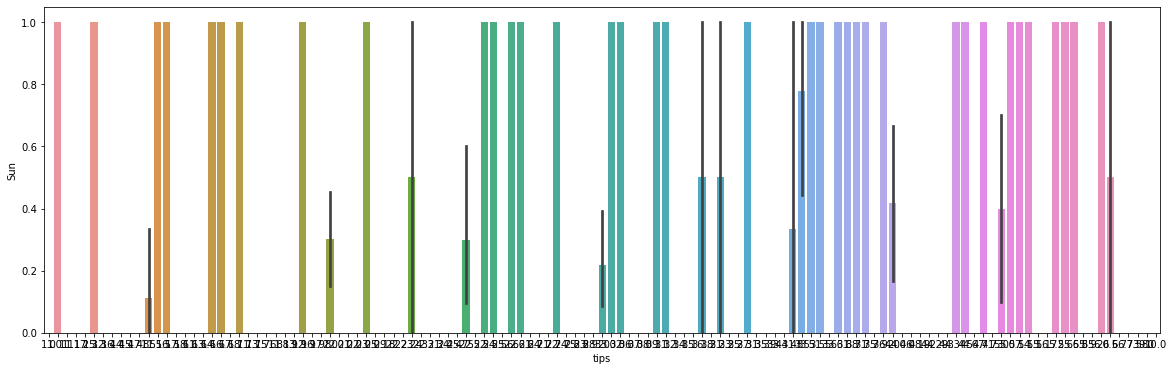

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


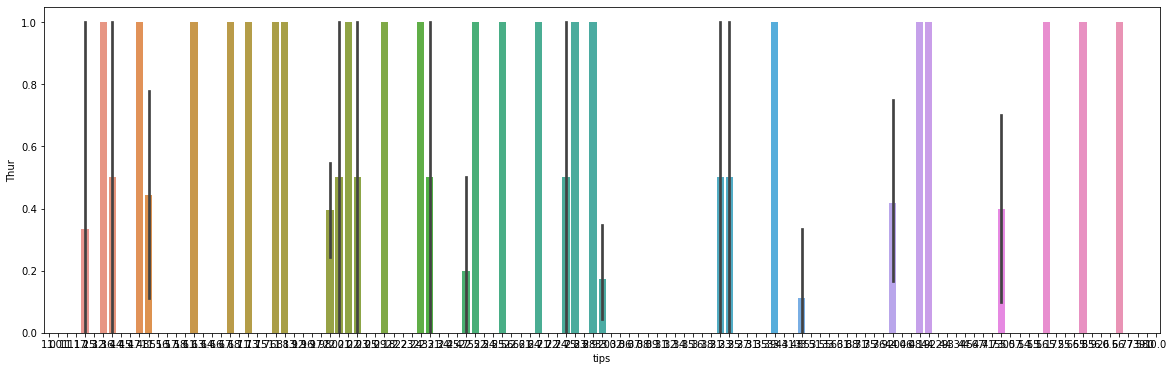

In [40]:
for i in ['size','Male','Smoker','Lunch','Total_Bill','Fri','Sat','Sun','Thur']:
    plt.figure(figsize=(20,6))
    sns.barplot(df['tips'],df[i])
    plt.show()

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = df.drop('tips', axis=1)
y = df['tips']
xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=101, test_size=0.2)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
model = LinearRegression().fit(xtrain, ytrain)

In [31]:
model.score(xtest, ytest)

0.3371084116759542

In [32]:
# we can use polynomial_regression

In [33]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
xpoly = PolynomialFeatures().fit_transform(X)

In [35]:
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(xpoly, y, test_size=0.25, random_state=101)

In [36]:
model2 = LinearRegression().fit(xpoly, y)
100*model2.score(xpoly, y)

56.98957845789635

In [37]:
xpoly3 = PolynomialFeatures(degree=3).fit_transform(X)
xpoly3

array([[1., 2., 0., ..., 0., 0., 0.],
       [1., 3., 1., ..., 0., 0., 0.],
       [1., 3., 1., ..., 0., 0., 0.],
       ...,
       [1., 2., 1., ..., 0., 0., 0.],
       [1., 2., 1., ..., 0., 0., 0.],
       [1., 2., 0., ..., 0., 0., 1.]])

In [38]:
model3 = LinearRegression().fit(xpoly3, y)
100*model3.score(xpoly3, y)

21.508506961495765

In [39]:
xpoly

array([[1., 2., 0., ..., 1., 0., 0.],
       [1., 3., 1., ..., 1., 0., 0.],
       [1., 3., 1., ..., 1., 0., 0.],
       ...,
       [1., 2., 1., ..., 0., 0., 0.],
       [1., 2., 1., ..., 0., 0., 0.],
       [1., 2., 0., ..., 0., 0., 1.]])

In [41]:
xpoly3 = PolynomialFeatures(degree=4).fit_transform(X)
model3 = LinearRegression().fit(xpoly3, y)
100*model3.score(xpoly3, y)

81.72321957040536

In [45]:
xpoly3 = PolynomialFeatures(degree=6).fit_transform(X)
model3 = LinearRegression().fit(xpoly3, y)
100*model3.score(xpoly3, y)

90.16855059309735